In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [2]:
df = pd.read_csv('train.csv')

In [3]:
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


### Descriptive Statistical Analysis

In [4]:
# 1
np.mean(df['Age'])

38.822583565331705

In [5]:
# 2
np.mean(df['Annual_Premium'])

30564.389581458323

In [6]:
# 3
print(df['Gender'].tolist().count('Male'), df['Gender'].tolist().count('Female'))

206089 175020


In [7]:
# 4
print(df.loc[df['Gender'] == 'Male', 'Age'].mean(), df.loc[df['Gender'] == 'Female', 'Age'].mean())

40.90309526466721 36.372745971888925


In [8]:
# 5
print(df.loc[df['Previously_Insured'] == 0, 'Annual_Premium'].mean(), df.loc[df['Previously_Insured'] == 1, 'Annual_Premium'].mean())

30496.81576028787 30644.289197608632


In [9]:
# 6
print(df.loc[df['Driving_License'] == 0, 'Annual_Premium'].mean(), df.loc[df['Driving_License'] == 1, 'Annual_Premium'].mean())

34999.72783251232 30554.919365653688


In [10]:
# 7
print(df.loc[df['Previously_Insured'] == 0, 'Annual_Premium'].var(), df.loc[df['Previously_Insured'] == 1, 'Annual_Premium'].var())

335192986.22611684 250286699.85283348


### Discrete Variable Analysis

<BarContainer object of 66 artists>

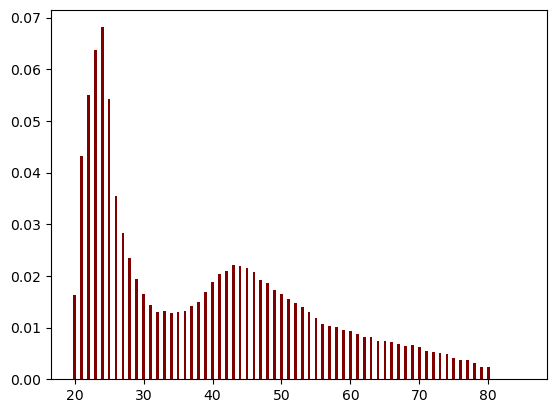

In [11]:
# 1
plt.bar(df['Age'].value_counts(normalize=True).index, df['Age'].value_counts(normalize=True).values, color ='maroon', width = 0.4)

In [12]:
# 2
df['Gender'].value_counts(normalize=True)

Gender
Male      0.540761
Female    0.459239
Name: proportion, dtype: float64

In [13]:
# 3
malePremium = df.loc[df['Gender'] == 'Male', 'Annual_Premium'].mean()
femalePremium = df.loc[df['Gender'] == 'Female', 'Annual_Premium'].mean()
{
    "malePremiumProportion": malePremium / (malePremium + femalePremium),
    "femalePremiumProportion": femalePremium / (malePremium + femalePremium)
}

{'malePremiumProportion': 0.5010378303055196,
 'femalePremiumProportion': 0.4989621696944805}

In [14]:
# 4
df['Previously_Insured'].value_counts(normalize=True)

Previously_Insured
0    0.54179
1    0.45821
Name: proportion, dtype: float64

In [15]:
# 5
df['Vehicle_Age'].value_counts(normalize=True)

Vehicle_Age
1-2 Year     0.525613
< 1 Year     0.432385
> 2 Years    0.042001
Name: proportion, dtype: float64

In [16]:
# 6
df['Response'].value_counts(normalize=True)

Response
0    0.877437
1    0.122563
Name: proportion, dtype: float64

In [17]:
# 7
df.loc[df['Vehicle_Age'] == '< 1 Year', 'Response'].value_counts(normalize=True)

Response
0    0.956295
1    0.043705
Name: proportion, dtype: float64

In [18]:
# 8
df.loc[df['Previously_Insured'] == 1, 'Response'].value_counts(normalize=True)

Response
0    0.999095
1    0.000905
Name: proportion, dtype: float64

### Continuous Variable Analysis

In [19]:
# 1
ageAbove30WithPremiumAbove30500Prob = len(df[df['Age'] > 30][df['Annual_Premium'] > 30500])/len(df[df['Age'] > 30])
ageBelow30WithPremiumAbove30500Prob = len(df[df['Age'] < 30][df['Annual_Premium'] > 30500])/len(df[df['Age'] < 30])
ageAbove30WithPremiumAbove30500Prob, ageBelow30WithPremiumAbove30500Prob

C:\Users\TEMP.CS2K16.001\AppData\Local\Temp\ipykernel_1456\1728811000.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ageAbove30WithPremiumAbove30500Prob = len(df[df['Age'] > 30][df['Annual_Premium'] > 30500])/len(df[df['Age'] > 30])
C:\Users\TEMP.CS2K16.001\AppData\Local\Temp\ipykernel_1456\1728811000.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ageBelow30WithPremiumAbove30500Prob = len(df[df['Age'] < 30][df['Annual_Premium'] > 30500])/len(df[df['Age'] < 30])


(0.5771233974358975, 0.5028382183334085)

In [20]:
# 2
ageAbove30NoPrevInsWithPremiumAbove30500Prob = len(df[df['Age'] > 30][df['Previously_Insured'] == 0][df['Annual_Premium'] > 30500])/len(df[df['Age'] > 30][df['Previously_Insured'] == 0])
ageBelow30PrevInsWithPremiumAbove30500Prob = len(df[df['Age'] < 30][df['Previously_Insured'] == 1][df['Annual_Premium'] > 30500])/len(df[df['Age'] < 30][df['Previously_Insured'] == 1])
ageAbove30NoPrevInsWithPremiumAbove30500Prob, ageBelow30PrevInsWithPremiumAbove30500Prob

C:\Users\TEMP.CS2K16.001\AppData\Local\Temp\ipykernel_1456\2475906166.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ageAbove30NoPrevInsWithPremiumAbove30500Prob = len(df[df['Age'] > 30][df['Previously_Insured'] == 0][df['Annual_Premium'] > 30500])/len(df[df['Age'] > 30][df['Previously_Insured'] == 0])
C:\Users\TEMP.CS2K16.001\AppData\Local\Temp\ipykernel_1456\2475906166.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ageAbove30NoPrevInsWithPremiumAbove30500Prob = len(df[df['Age'] > 30][df['Previously_Insured'] == 0][df['Annual_Premium'] > 30500])/len(df[df['Age'] > 30][df['Previously_Insured'] == 0])
C:\Users\TEMP.CS2K16.001\AppData\Local\Temp\ipykernel_1456\2475906166.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ageAbove30NoPrevInsWithPremiumAbove30500Prob = len(df[df['Age'] > 30][df['Previously_Insured'] == 0][df['Annual_Premium'] > 30500])/len(df[df['Age'] > 30][df['Previ

(0.589107497393741, 0.5065978310916055)

### Variable Correlation Analysis

0.06750700155669287


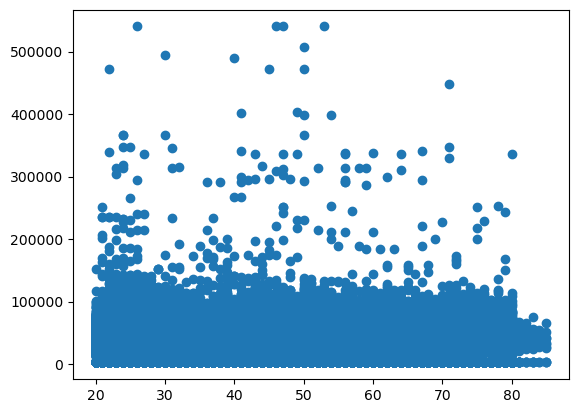

In [21]:
# 1
print(df['Age'].corr(df['Annual_Premium']))
plt.scatter(df['Age'], df['Annual_Premium'])

0.02687233319314491


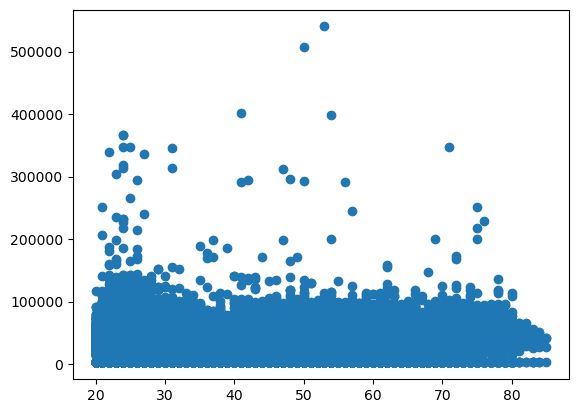

In [22]:
# 2
print(df['Age'][df['Previously_Insured'] == 1].corr(df['Annual_Premium']))
plt.scatter(df['Age'][df['Previously_Insured'] == 1], df['Annual_Premium'][df['Previously_Insured'] == 1])

### Hypothesis Testing

In [23]:
from scipy.stats import ttest_ind

# Question 1
insured = df[df['Previously_Insured'] == 1]['Annual_Premium']
not_insured = df[df['Previously_Insured'] == 0]['Annual_Premium']

t_statistic, p_value = ttest_ind(insured, not_insured, alternative='less')

print(f"Question 1: t-statistic: {t_statistic}, p-value: {p_value}")

# Question 2
license = df[df['Driving_License'] == 1]['Annual_Premium']
no_license = df[df['Driving_License'] == 0]['Annual_Premium']

t_statistic, p_value = ttest_ind(license, no_license, alternative='less')

print(f"Question 2: t-statistic: {t_statistic}, p-value: {p_value}")

Question 1: t-statistic: 2.6352941274023465, p-value: 0.9957966097249437
Question 2: t-statistic: -7.3508514851527735, p-value: 9.866978896178617e-14


**Question 1:** The p-value is approximately 0.996, which is greater than the typical significance level of 0.05. This means that we fail to reject the null hypothesis. In other words, the data does not provide strong evidence to conclude that the annual premium for those previously insured is greater than the annual premium for those not previously insured.

**Question 2:** The p-value is approximately (9.87 \times 10^{-14}), which is much smaller than the typical significance level of 0.05. This means that we reject the null hypothesis. In other words, the data provides strong evidence to conclude that the annual premium for those who have a driving license is greater than the annual premium for those who do not have a driving license.